In [1]:
import cv2
from easyocr import Reader
#import keras_ocr
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import pytesseract

In [2]:
! wget https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata
! sudo mv ./eng.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

--2022-04-11 19:02:02--  https://github.com/tesseract-ocr/tessdata/raw/main/eng.traineddata
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/eng.traineddata [following]
--2022-04-11 19:02:02--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/eng.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23466654 (22M) [application/octet-stream]
Saving to: ‘eng.traineddata’

eng.traineddata     100%[===================>]  22.38M   106MB/s    in 0.2s    

2022-04-11 19:02:03 (106 MB/s) - ‘eng.traineddata’ saved [23466654/23466654]



In [14]:
! ls /usr/share/tesseract-ocr/4.00/tessdata/ -la

total 33260
drwxr-xr-x 1 root root     4096 Apr 11 14:50 .
drwxr-xr-x 1 root root     4096 Mar 23 14:12 ..
drwxr-xr-x 2 root root     4096 Mar 23 14:12 configs
-rw-r--r-- 1 root root 23466654 Apr 11 14:50 eng.traineddata
-rw-r--r-- 1 root root 10562727 Sep 15  2017 osd.traineddata
-rw-r--r-- 1 root root      572 Apr  7  2018 pdf.ttf
drwxr-xr-x 2 root root     4096 Mar 23 14:12 tessconfigs


In [12]:
! pwd

/content


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd ./drive/MyDrive/fifa-reader

/content/drive/MyDrive/fifa-reader


In [5]:
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

In [ ]:
image_path = "data/10-11-2020_16-35-35-qyrqt4lh.png"

image = cv2.imread(image_path)

reader = Reader(["en"], gpu=True)

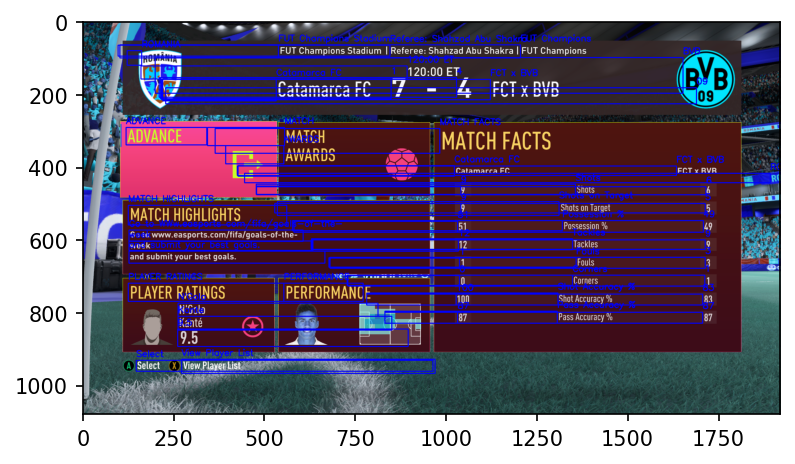

In [ ]:
results = reader.readtext(image, detail = 1)

for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    
    tl = (int(top_left[0]), int(top_left[1]))
    tr = (int(top_right[0]), int(top_right[1]))
    br = (int(bottom_right[1]), int(bottom_right[1]))
    bl = (int(bottom_left[0]), int(bottom_left[1]))
    
    cv2.rectangle(image, tl, br, (0, 0, 255), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)
    

#image[170:200, 860:880] = 0 #home score
#image[170:200, 1040:1060] = 0 #away score

#image[170:200, 770:790] = 0 #home name
#image[170:200, 1140:1160] = 0 #away name

#image[135:145, 950:970] = 0 #time


plt.rcParams['figure.dpi'] = 150
plt.imshow(image)
plt.show()

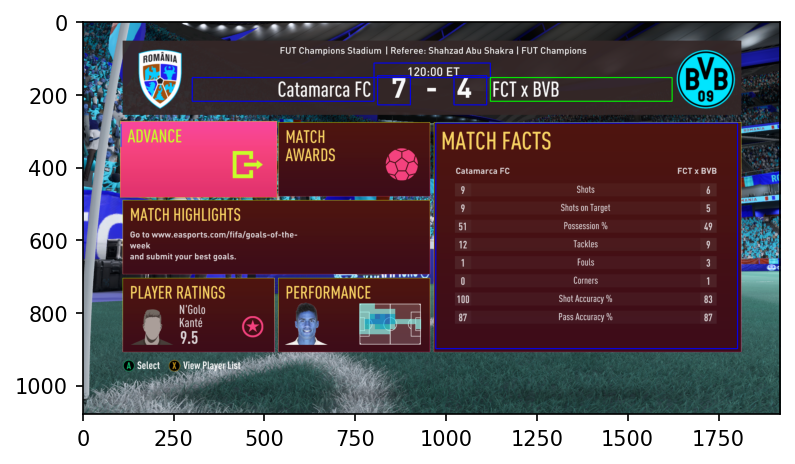

In [ ]:
image = cv2.imread(image_path)

cv2.rectangle(image, (970, 280), (1800, 900), (0, 0, 255), 2) #match facts

cv2.rectangle(image, (800, 115), (1120, 155), (0, 0, 255), 2) #time

home_name_tl = (300, 155)
name_width = 500
name_height = 65
cv2.rectangle(image, home_name_tl, (home_name_tl[0]+name_width, home_name_tl[1]+name_height), (0, 0, 255), 2) #home name

away_name_tl = (1120, 155)
cv2.rectangle(image, away_name_tl, (away_name_tl[0]+name_width, away_name_tl[1]+name_height), (0, 255, 0), 2) #away name


score_width = 90
score_height = 80
home_score = (810, 150)
cv2.rectangle(image, home_score, (home_score[0]+score_width, home_score[1]+score_height), (0, 0, 255), 2) #home score

away_score = (1020, 150)
cv2.rectangle(image, away_score, (away_score[0]+score_width, away_score[1]+score_height), (0, 0, 255), 2) #away score

plt.rcParams['figure.dpi'] = 150
plt.imshow(image)
plt.show()

In [6]:
class Team():
    def __init__(self, shots, shots_on_target, possession, tackles, fouls, corners, shot_acc, pass_acc, name="", score=""):
        self.name = name
        self.score = score
        self.shots = shots
        self.shots_on_target = shots_on_target
        self.possession = possession
        self.tackles = tackles
        self.fouls = fouls
        self.corners = corners
        self.shot_acc = shot_acc
        self.pass_acc = pass_acc
        
    def __str__(self):
        return "Team:\t " + self.name + \
                    "\nScore:\t " + str(self.score) + \
                    "\nShots:\t " + str(self.shots) + \
                    "\nShots on target:\t " + str(self.shots_on_target) + \
                    "\nPossession:\t " + str(self.possession) + \
                    "\nTackles:\t " + str(self.tackles) + \
                    "\nFouls:\t " + str(self.fouls) + \
                    "\nCorners:\t " + str(self.corners) + \
                    "\nShot accuracy:\t " + str(self.shot_acc) + \
                    "\nPass accuracy:\t " + str(self.pass_acc)


class Match():
    def __init__(self, home, away, time, cancelled=False):
        self.home = home
        self.away = away
        self.time = time
        self.cancelled = cancelled
        
    def __str__(self):
        if self.cancelled:    
            return self.home.name + " - " + self.away.name + " \t" \
                + " (Cancelled after " + str(self.time) + ")"
        else:
            return self.home.name + " - " + self.away.name + " \t" \
                + str(self.home.score) + ":" + str(self.away.score) + " (" + str(self.time) + ")"
        
    def get_data_frame(self, filename=None):
        return pd.DataFrame.from_dict({
                   "h_team": [self.home.name],\
                   "a_team": [self.away.name],\
                   "time": [self.time],\
                   "h_score": [self.home.score],\
                   "a_score": [self.away.name],\
                   "cancelled": [self.cancelled],\
                   "h_shots": [self.home.shots],\
                   "h_shots_on_target": [self.home.shots_on_target],\
                   "h_possession": [self.home.possession],\
                   "h_tackles": [self.home.tackles],\
                   "h_fouls": [self.home.fouls],\
                   "h_corners": [self.home.corners],\
                   "h_shot_acc": [self.home.shot_acc],\
                   "h_pass_acc": [self.home.pass_acc],\
                   "a_shots": [self.away.shots],\
                   "a_shots_on_target": [self.away.shots_on_target],\
                   "a_possession": [self.away.possession],\
                   "a_tackles": [self.away.tackles],\
                   "a_fouls": [self.away.fouls],\
                   "a_corners": [self.away.corners],\
                   "a_shot_acc": [self.away.shot_acc],\
                   "a_pass_acc": [self.away.pass_acc],\
                   "filename": [filename]
                  }
        )


In [ ]:
# initialize keras ocr
# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

NameError: name 'keras_ocr' is not defined

In [7]:
def detect_keras_ocr(image):
    image = cv2.blur(image, (3, 3))
    plt.imshow(image)
    plt.show()
    detections = pipeline.recognize([image])[0]
    recognized_text = ""
    for i in detections:
        recognized_text = recognized_text + " " + i[0]
    return recognized_text.strip()

def easy_ocr_reader(image):
    result = reader.readtext(image, detail = 0)
    if len(result) > 0 :
        return result[0]
    else:
        return None

def detect_statistic_digits_pytesseract(image):
    if np.mean(image) > 100:
      image = (255-image)
    image = apply_brightness_contrast(image, brightness=100, contrast=-300)
    image = thresholding_operation(image)
    image = dilate_operation(image)
    #plt.imshow(image)
    #plt.show()
    config = r'--psm 6 --oem 0 outputbase digits'
    result = pytesseract.image_to_string(image, config=config)
    return result.split("\n")[:-1]

def detect_statistic_digits(image):
    home = detect_statistic_digits_pytesseract(image[440:850, 970:1120])
    away = detect_statistic_digits_pytesseract(image[440:850, 1650:1760])
    home_team_stats = create_team_stats_from_result_list(home)
    away_team_stats = create_team_stats_from_result_list(away)
    return home_team_stats, away_team_stats

def read_text_pytesseract(image):
    config = r'--psm 7 --oem 3'
    result = pytesseract.image_to_string(image, config=config)
    return "".join(result.split("\n")[:-1])

def read_text(image):
    return easy_ocr_reader(image)
    #return detect_keras_ocr(image)

def read_string_from_box(image, top_left=None, bottom_right=None, canny=False):
    if not top_left:
        top_left = (0, 0)
    if not bottom_right:
        bottom_right = (image.shape[0], image.shape[1])
    img_box = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    
    #opened = opening_operation(img_box)
    #plt.imshow(opened)
    #plt.show()
    if canny:
        img_box = canny_operation(img_box)

    #plt.imshow(img_box)
    #plt.show()
    #result = easy_ocr_reader(img_box)
    result = read_text_pytesseract(img_box)
    return result

def create_team_stats_from_result_list(stats):
    assert(len(stats) == 8)
    return Team(
        shots = stats[0], 
        shots_on_target = stats[1], 
        possession = stats[2],
        tackles = stats[3],
        fouls = stats[4],
        corners = stats[5],
        shot_acc = stats[6],
        pass_acc = stats[7]
    )
    
def create_team_from_results(results, home=True, team_name = "", score = 0):
    index_operator = -1
    if not home:
        index_operator = 1
        
    return Team(
        name = team_name, 
        score = score, 
    )

def create_team_stats(image, home_team_name="", away_team_name="", home_score=0, away_score=0):
    #img_box = image[280:900, 970:1800]
    #img_box = cv2.blur(img_box, (3, 3))
    #plt.imshow(img_box)
    #plt.show()
    #assert(results.upper() == "MATCH FACTS")
    home_team_stats, away_team_stats = detect_statistic_digits(image)

    #home_team = create_team_from_results(results, home=True, team_name=home_team_name, score=home_score)
    #away_team = create_team_from_results(results, home=False, team_name=away_team_name, score=away_score)

    return home_team, away_team


def extract_team_statistics(image, home=True):
    offset = 0 if home else 40
    shots = read_string_from_text(image, (), ())


def extract_match_statistics(image):
    time = read_string_from_box(image, (800, 115), (1120, 155), canny=False)
    home_name = read_string_from_box(image, (300, 155), (800, 220), canny=True)
    away_name = read_string_from_box(image, (1120, 155), (1620, 220), canny=True)
    
    home_score = "".join(detect_statistic_digits_pytesseract(image[150:230, 820:900]))
    home_score = home_score if home_score.isdigit() else None
    
    away_score = "".join(detect_statistic_digits_pytesseract(image[150:230, 1020:1110]))
    away_score = away_score if away_score.isdigit() else None
        
    home_team, away_team = detect_statistic_digits(image)
    home_team.name = home_name
    home_team.score = home_score
    away_team.name = away_name
    away_team.score = away_score
    
    cancelled = (not home_score) and (not away_score)
    match = Match(home=home_team, away=away_team, time=time, cancelled=cancelled)
    return match

32.41817886178862
129.941918699187


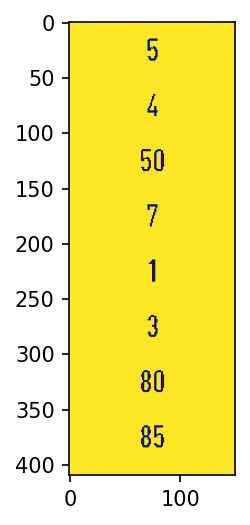

36.48325942350333
128.90472283813747


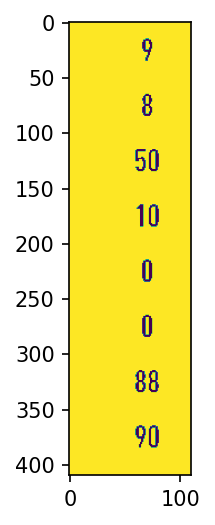

['5', '4', '50', '7', '1', '3', '80', '85']
['9', '8', '50', '10', '0', '0', '88', '90']


(<__main__.Team at 0x7f9b693247d0>, <__main__.Team at 0x7f9b69324fd0>)

In [74]:
image = cv2.imread("../data/10-11-2020_16-35-36-0ag1a4hv.png")
image = cv2.resize(image, dsize=(1920, 1080), interpolation=cv2.INTER_NEAREST)
image = get_grayscale(image)
detect_statistic_digits(image)
#match = extract_match_statistics(image)
#print(match)

----------------------------
image: ../data/WL261.jpg


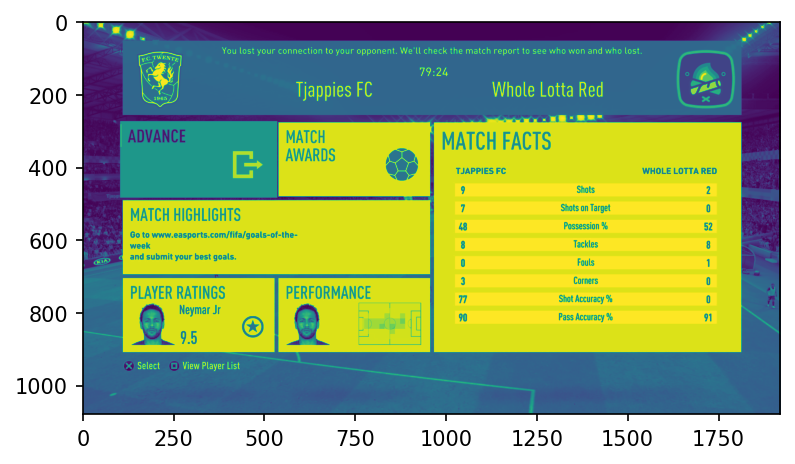

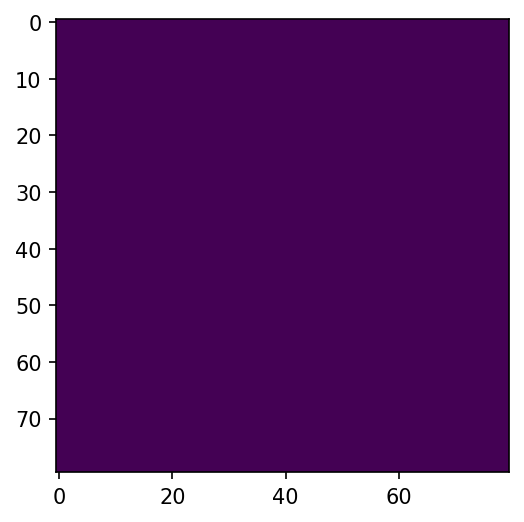

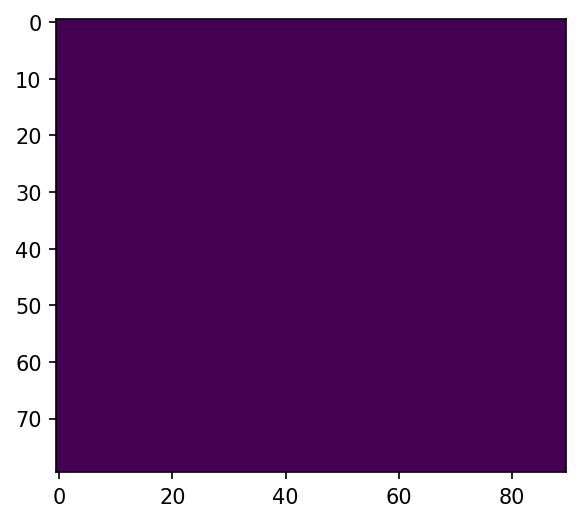

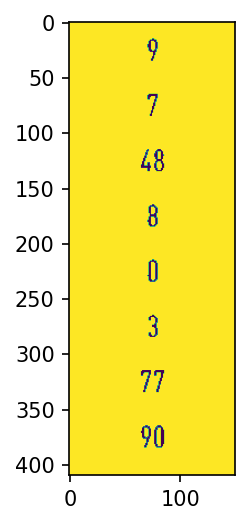

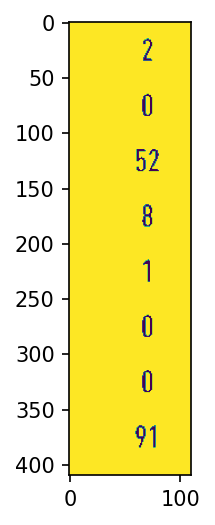

['9', '7', '48', '8', '0', '3', '77', '90']
['2', '0', '52', '8', '1', '0', '0', '91']
Tjappies FC - Whole Lotta Red 	 (Cancelled after 79:24)
Team:	 Tjappies FC
Score:	 None
Shots:	 9
Shots on target:	 7
Possession:	 48
Tackles:	 8
Fouls:	 0
Corners:	 3
Shot accuracy:	 77
Pass accuracy:	 90
Team:	 Whole Lotta Red
Score:	 None
Shots:	 2
Shots on target:	 0
Possession:	 52
Tackles:	 8
Fouls:	 1
Corners:	 0
Shot accuracy:	 0
Pass accuracy:	 91
----------------------------
image: ../data/10-11-2020_16-35-36-0ag1a4hv.png


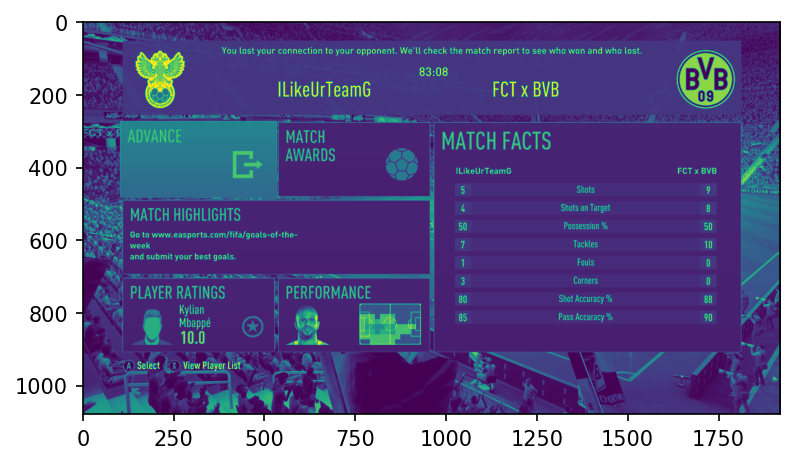

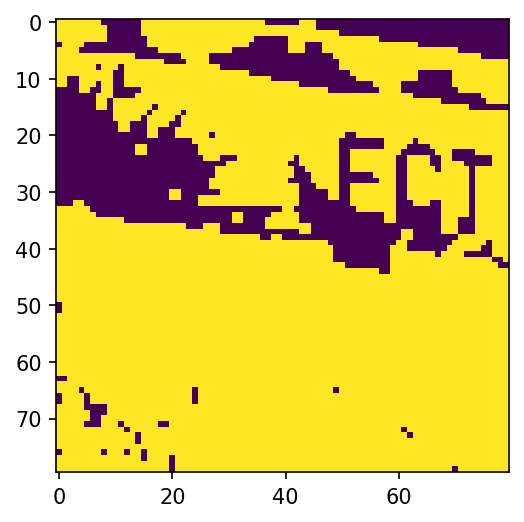

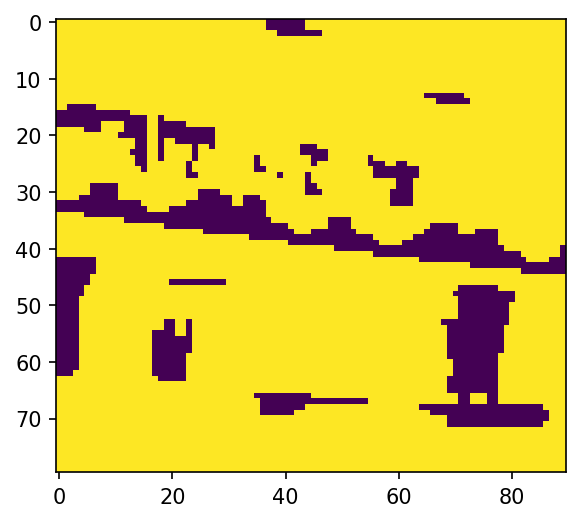

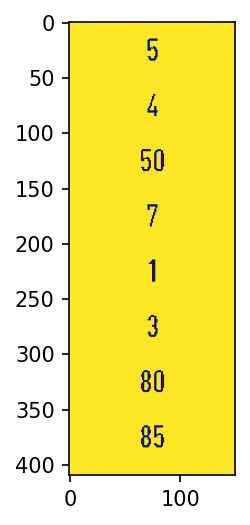

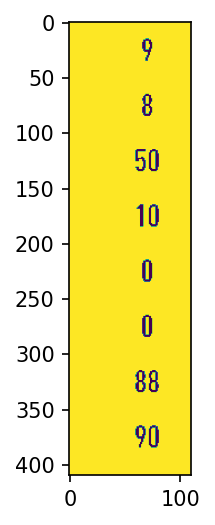

['5', '4', '50', '7', '1', '3', '80', '85']
['9', '8', '50', '10', '0', '0', '88', '90']
INEEgERmE - FCT % BVB 	 (Cancelled after FXTL)
Team:	 INEEgERmE
Score:	 None
Shots:	 5
Shots on target:	 4
Possession:	 50
Tackles:	 7
Fouls:	 1
Corners:	 3
Shot accuracy:	 80
Pass accuracy:	 85
Team:	 FCT % BVB
Score:	 None
Shots:	 9
Shots on target:	 8
Possession:	 50
Tackles:	 10
Fouls:	 0
Corners:	 0
Shot accuracy:	 88
Pass accuracy:	 90
----------------------------
image: ../data/10-11-2020_16-35-35-qyrqt4lh.png


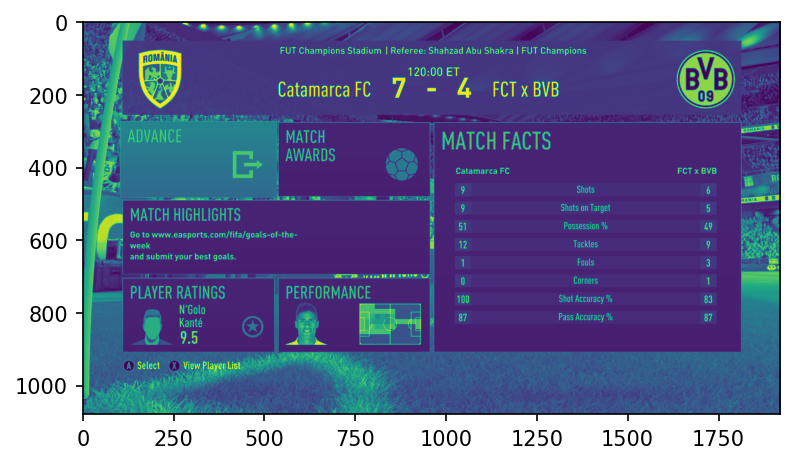

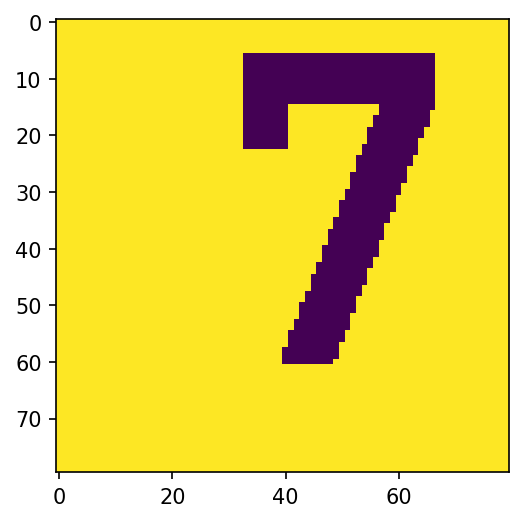

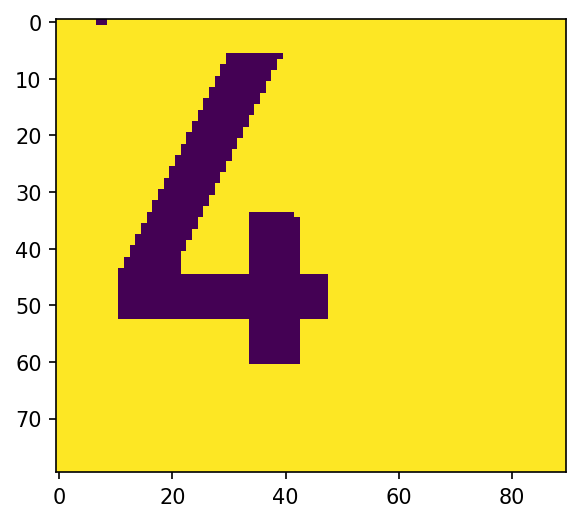

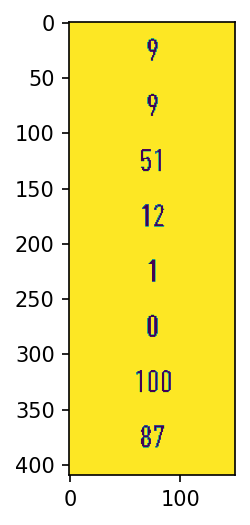

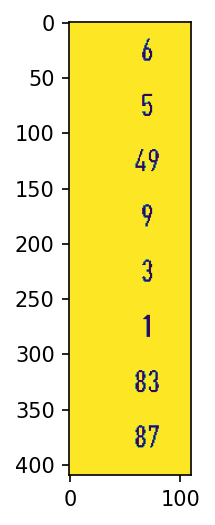

['9', '9', '51', '12', '1', '0', '1110', '87']
['6', '5', '49', '9', '3', '1', '83', '87']
(Ll - WIS 	7:4 (120:00 ET)
Team:	 (Ll
Score:	 7
Shots:	 9
Shots on target:	 9
Possession:	 51
Tackles:	 12
Fouls:	 1
Corners:	 0
Shot accuracy:	 1110
Pass accuracy:	 87
Team:	 WIS
Score:	 4
Shots:	 6
Shots on target:	 5
Possession:	 49
Tackles:	 9
Fouls:	 3
Corners:	 1
Shot accuracy:	 83
Pass accuracy:	 87
----------------------------
image: ../data/10-11-2020_16-35-36-0wd3xedc.png


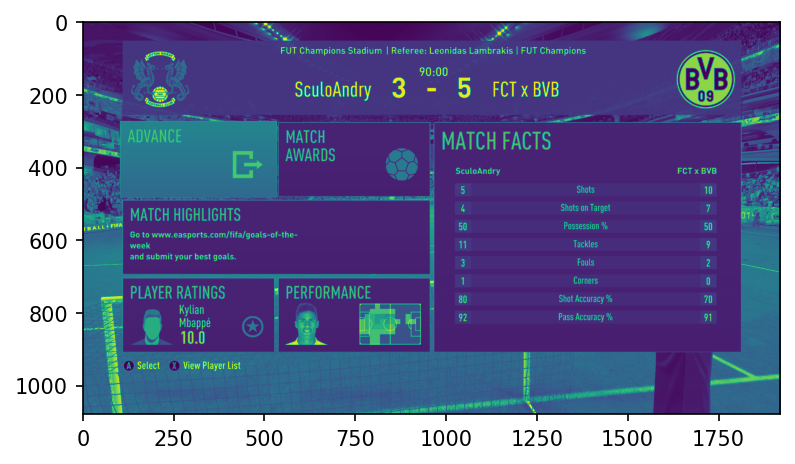

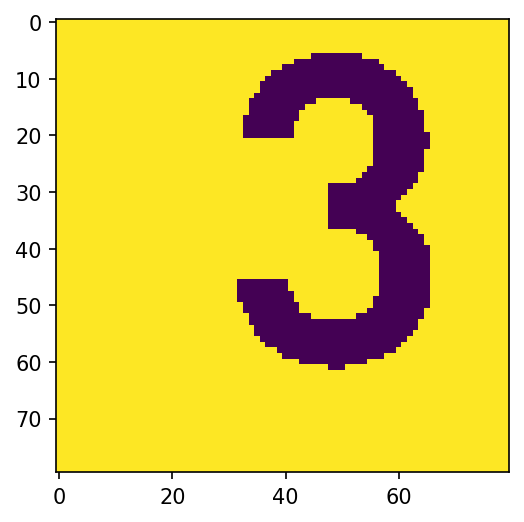

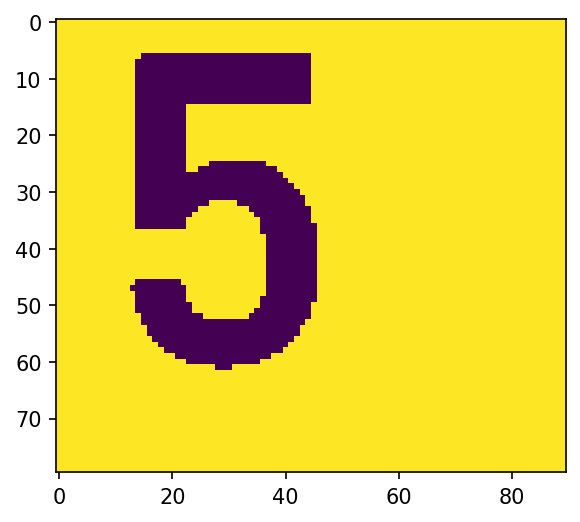

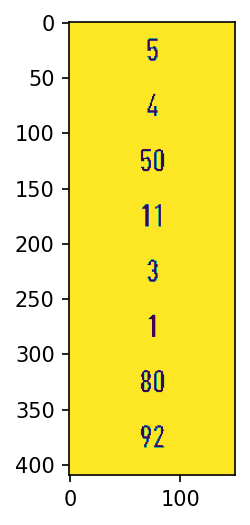

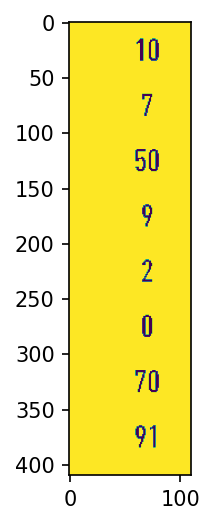

['5', '4', '50', '11', '3', '1', '80', '92']
['10', '7', '50', '9', '2', '0', '70', '91']
Sl - RS 	3:5 (CIH0])
Team:	 Sl
Score:	 3
Shots:	 5
Shots on target:	 4
Possession:	 50
Tackles:	 11
Fouls:	 3
Corners:	 1
Shot accuracy:	 80
Pass accuracy:	 92
Team:	 RS
Score:	 5
Shots:	 10
Shots on target:	 7
Possession:	 50
Tackles:	 9
Fouls:	 2
Corners:	 0
Shot accuracy:	 70
Pass accuracy:	 91
----------------------------
image: ../data/WL249.jpg


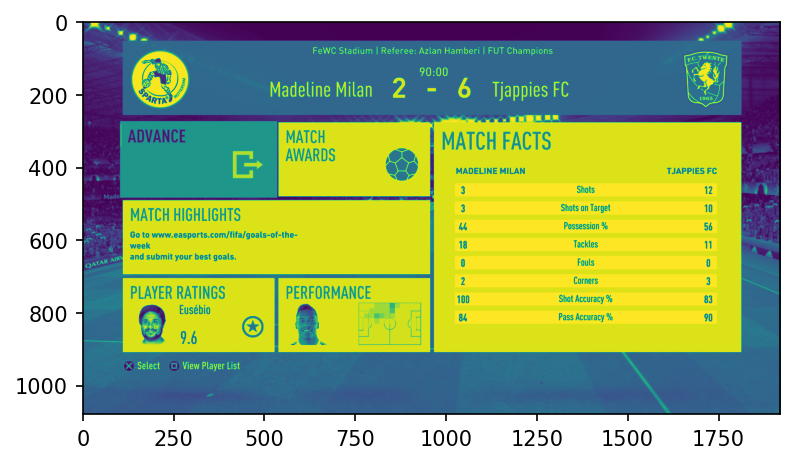

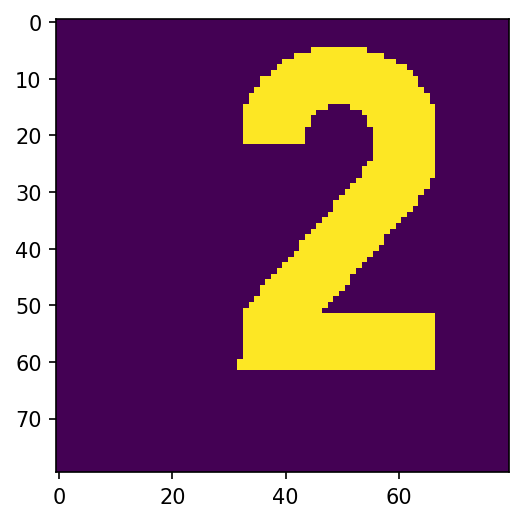

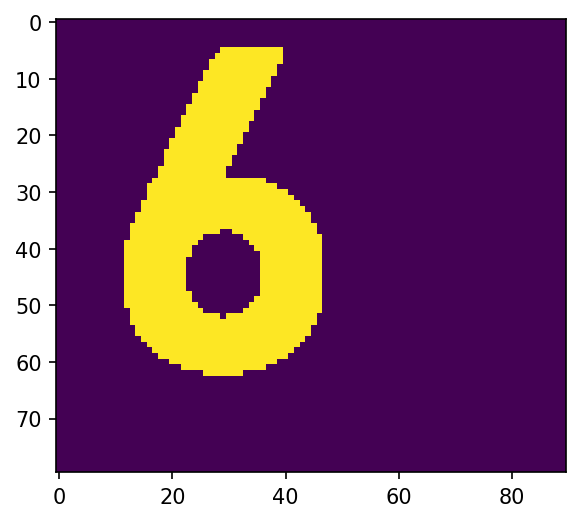

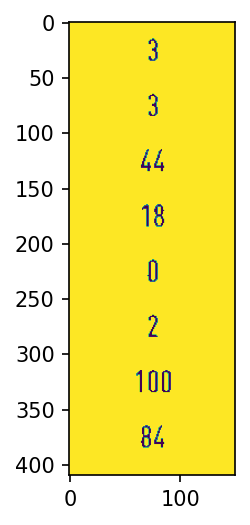

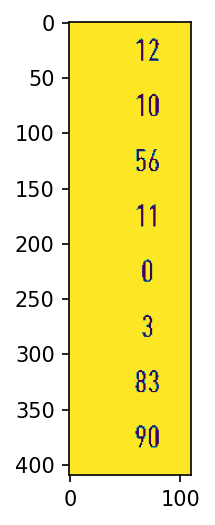

['3', '3', '41.', '18', '0', '2', '100', '81.']
['12', '10', '56', '11', '0', '3', '83', '90']
el eR il - Tisppies FC 	2:6 (ClH0))
Team:	 el eR il
Score:	 2
Shots:	 3
Shots on target:	 3
Possession:	 41.
Tackles:	 18
Fouls:	 0
Corners:	 2
Shot accuracy:	 100
Pass accuracy:	 81.
Team:	 Tisppies FC
Score:	 6
Shots:	 12
Shots on target:	 10
Possession:	 56
Tackles:	 11
Fouls:	 0
Corners:	 3
Shot accuracy:	 83
Pass accuracy:	 90


In [76]:
images = ["../data/WL261.jpg", "../data/10-11-2020_16-35-36-0ag1a4hv.png", 
         "../data/10-11-2020_16-35-35-qyrqt4lh.png",
         "../data/10-11-2020_16-35-36-0wd3xedc.png",
         "../data/WL249.jpg"
         ]

resolution = (1080, 1920, 3)
for image_path in images:
    print("----------------------------")
    print("image: " + image_path)

    image = cv2.imread(image_path)
    if image.shape != resolution:
        image = cv2.resize(image, dsize=(1920, 1080), interpolation=cv2.INTER_NEAREST)
    #print(image.shape)
    image = get_grayscale(image)
    
    plt.rcParams['figure.dpi'] = 150
    plt.imshow(image)
    plt.show()
    match = extract_match_statistics(image)
    print(match)
    print(match.home)
    print(match.away)


In [10]:
df = pd.DataFrame({"h_team": pd.Series(dtype='string'),\
                   "a_team": pd.Series(dtype='string'),\
                   "time": pd.Series(dtype='string'),\
                   "h_score": pd.Series(dtype='int'),\
                   "a_score": pd.Series(dtype='int'),\
                   "cancelled": pd.Series(dtype='bool'),\
                   "h_shots": pd.Series(dtype='int'),\
                   "h_shots_on_target": pd.Series(dtype='int'),\
                   "h_possession": pd.Series(dtype='int'),\
                   "h_tackles": pd.Series(dtype='int'),\
                   "h_fouls": pd.Series(dtype='int'),\
                   "h_corners": pd.Series(dtype='int'),\
                   "h_shot_acc": pd.Series(dtype='int'),\
                   "h_pass_acc": pd.Series(dtype='int'),\
                   "a_shots": pd.Series(dtype='int'),\
                   "a_shots_on_target": pd.Series(dtype='int'),\
                   "a_possession": pd.Series(dtype='int'),\
                   "a_tackles": pd.Series(dtype='int'),\
                   "a_fouls": pd.Series(dtype='int'),\
                   "a_corners": pd.Series(dtype='int'),\
                   "a_shot_acc": pd.Series(dtype='int'),\
                   "a_pass_acc": pd.Series(dtype='int'),\
                   "filename": pd.Series(dtype='string')
                  })

expected_resolution = (1080, 1920, 3)
file_list = [f for f in os.listdir("./data") if f.endswith(".jpg") or f.endswith(".png") or f.endswith(".jpeg")]
total_image = len(file_list)

for idx, filename in enumerate(file_list):
    image = cv2.imread("./data/" + filename)
    if image.shape != expected_resolution:
        image = cv2.resize(image, dsize=(1920, 1080), interpolation=cv2.INTER_NEAREST)
    image = get_grayscale(image)
    match = None
    
    try:
        match = extract_match_statistics(image)
        df = pd.concat([df, match.get_data_frame(filename)])
    except Exception as err: 
        print("Problem with file " + filename)
        print(repr(err))
        #plt.imshow(image)
        #plt.show()

    if (idx%50) == 0:
        print(str(idx) + "/" + str(total_image))

df.to_csv("data.csv", index=False)

0/562
Problem with file WL87.jpg
AssertionError()
Problem with file FIFA 21 FUT Champions (In Menus)_71.jpg
AssertionError()
Problem with file FIFA 21 FUT Champions (In Menus)_65.jpg
AssertionError()
Problem with file WL-36.jpg
AssertionError()
Problem with file WL144.jpg
AssertionError()
50/562
Problem with file WL7.jpg
AssertionError()
Problem with file 10-11-2020_16-35-50-2uhbyqj4.png
AssertionError()
Problem with file WL221.jpg
AssertionError()
Problem with file WL341.jpg
AssertionError()
100/562
Problem with file WL140.jpg
AssertionError()
Problem with file WL-26.jpg
AssertionError()
Problem with file WL82.jpg
AssertionError()
Problem with file WL-33.jpg
AssertionError()
150/562
Problem with file 22-10-2020_13-54-42-sgtfmcuo.png
AssertionError()
Problem with file WL223.jpg
AssertionError()
Problem with file WL250.jpg
AssertionError()
Problem with file WL-40.jpg
AssertionError()
Problem with file WL318.jpg
AssertionError()
Problem with file WL319.jpg
AssertionError()
Problem with f

In [9]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding_operation(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate_operation(image):
    kernel = np.ones((2,2),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode_operation(image):
    kernel = np.ones((2,2), np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening_operation(image):
    kernel = np.ones((3,3),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny_operation(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

def apply_brightness_contrast(input_img, brightness = 0, contrast = 0): 
    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow
        
        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()
    
    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)
        
        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf